## Лабораторная работа №1 | Вариант 5

Выполнил: Арсельгов Адам М8О-313Б-23

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
I = np.eye(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
rgba = np.dtype([('r', np.ubyte), ('g', np.ubyte), ('b', np.ubyte), ('a', np.ubyte)])
pixel = np.array([(255, 128, 64, 255)], dtype=rgba)
print(pixel)

[(255, 128, 64, 255)]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [6]:
v = np.random.random(10)
v.sort()
print(v)

[0.06273585 0.09138209 0.12303707 0.27160058 0.55671517 0.63137255
 0.72182828 0.83856824 0.85466621 0.91206405]


5. Создайте read-only массив(неизменяемый)

In [8]:
a = np.arange(10)
a.flags.writeable = False

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [9]:
Z = np.random.random((10, 2))
X, Y = Z[:, 0], Z[:, 1]
R = np.sqrt(X**2 + Y**2)
T = np.arctan2(Y, X)
print(R, T)

[0.9157602  0.62003542 0.48604459 0.4782928  0.95288301 0.89210314
 0.66736488 0.70545974 1.08756355 0.96947142] [0.87042828 0.29433125 0.09966297 1.39837615 0.8448961  0.26052818
 0.60652645 0.43667101 1.05337694 1.15061159]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [10]:
Z = np.zeros((5, 5), [('x', float), ('y', float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5), np.linspace(0,1,5))
print(Z)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [11]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
C = 1 / (x[:, None] - y[None, :])
print(C)

[[-1.16434856 -0.41250997  0.36682171 -1.02189915 -0.46759508]
 [-0.55104867 -0.29585307  0.56489273 -0.5169448  -0.32315661]
 [ 2.15557175 -0.9079185   0.24698167  2.90534468 -1.22573189]
 [-5.43364274 -0.57163335  0.29403715 -3.29207919 -0.68315729]
 [ 0.96350144 -1.89590239  0.21631675  1.08913435 -4.13441866]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [12]:
A = np.arange(10, dtype=np.float32)
A = A.view(np.int32)

10. Как случайно заменить p элементов в 2D массиве?

In [13]:
Z = np.arange(100).reshape(10, 10)
p = 10
indices = np.random.choice(Z.size, p, replace=False)
Z.flat[indices] = 0
print(Z)

[[ 0  1  0  3  4  5  6  7  8  9]
 [10 11 12  0  0 15 16 17  0 19]
 [20 21 22 23 24 25 26 27 28  0]
 [30 31  0 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51  0 53 54 55 56 57 58  0]
 [60 61 62 63 64 65 66  0 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83  0 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("data.csv")

1. Узнайте сколько было на борту человек

In [16]:
len(df)

891

2. Какой медианный и средний возраста пассажиров

In [17]:
df['Age'].mean(), df['Age'].median()

(29.69911764705882, 28.0)

3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [18]:
children = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]
p_children = children['Survived'].mean() * 100
p_adults = adults['Survived'].mean() * 100
print(p_children, p_adults)

59.036144578313255 38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [19]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

5. Зависит ли выживаемость от класса обслуживания?

In [20]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

6. Посчитайте средний возраст умерших женщин и мужчин

In [21]:
df[df['Survived']==0].groupby('Sex')['Age'].mean()

Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64

7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [23]:
df['Relatives'] = df['SibSp'] + df['Parch']
df['Alone'] = df['Relatives'] == 0
df.groupby('Alone')['Survived'].mean()

Alone
False    0.505650
True     0.303538
Name: Survived, dtype: float64

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [24]:
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [25]:
df[(df['Survived']==1) & (df['Pclass']==2)]['Age'].agg(['min', 'max'])

min     0.67
max    62.00
Name: Age, dtype: float64

10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [26]:
young = df[(df['Sex']=='male') & (df['Age'] < 35)]
old = df[(df['Sex']=='male') & (df['Age'] >= 35)]
print(young['Survived'].mean(), old['Survived'].mean())

0.2140468227424749 0.18831168831168832


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возростов пассажиров

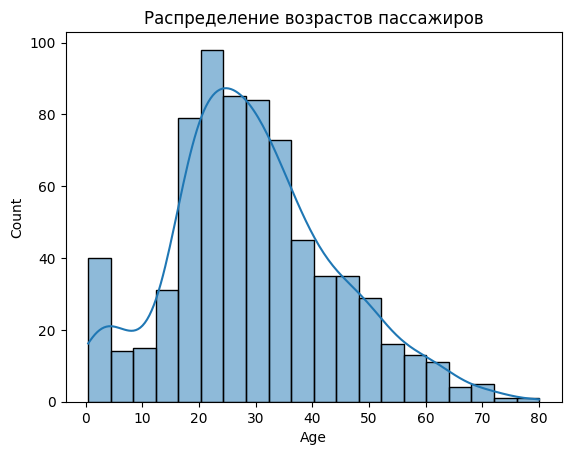

In [28]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Распределение возрастов пассажиров')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

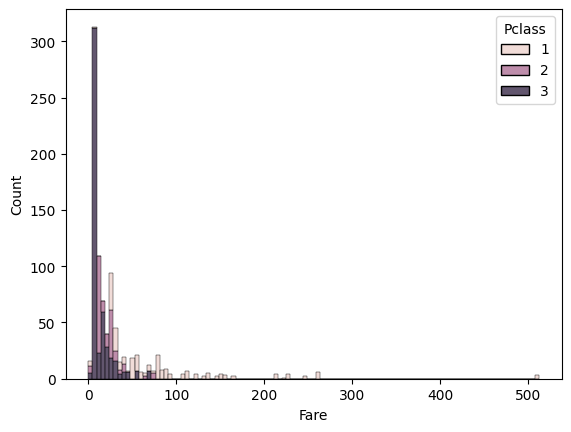

In [29]:
sns.histplot(data=df, x='Fare', hue='Pclass', multiple='stack')
plt.show()

3. Постройте зависимость цены от возраста пассажира

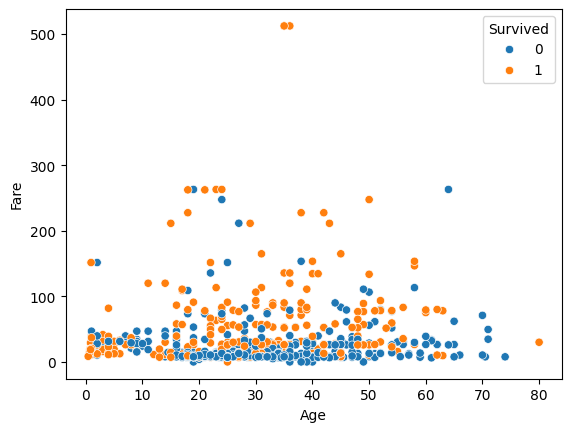

In [30]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

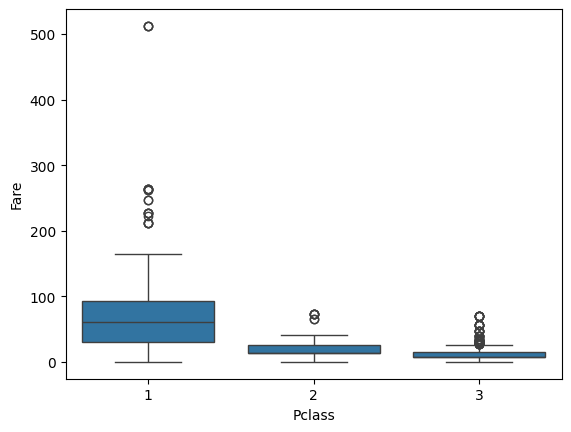

In [31]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

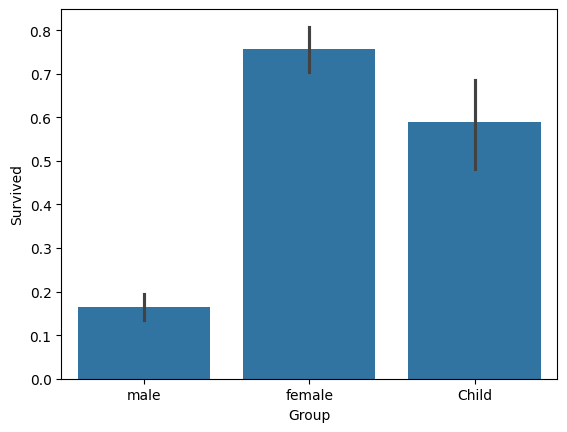

In [32]:
df['Group'] = np.where(df['Age'] < 16, 'Child', df['Sex'])
sns.barplot(data=df, x='Group', y='Survived')
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

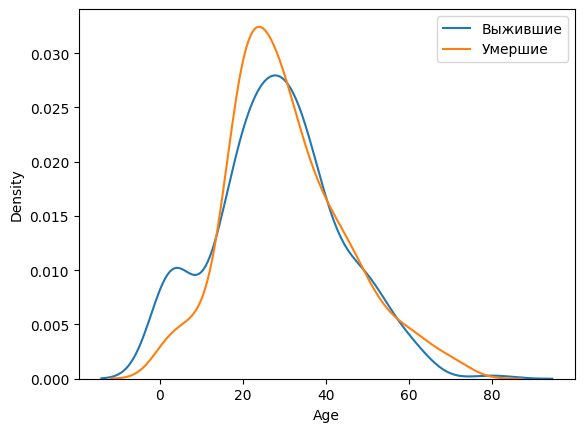

In [33]:
sns.kdeplot(data=df[df['Survived']==1]['Age'], label='Выжившие')
sns.kdeplot(data=df[df['Survived']==0]['Age'], label='Умершие')
plt.legend()
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

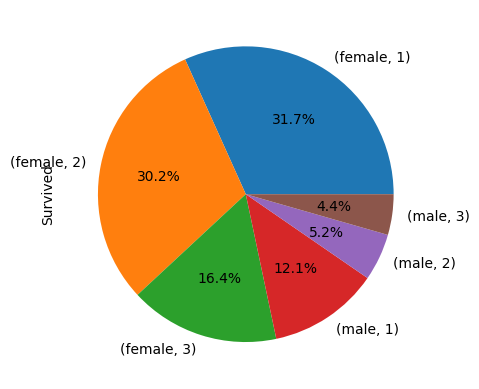

In [34]:
survival = df.groupby(['Sex','Pclass'])['Survived'].mean()
survival.plot.pie(autopct='%1.1f%%')
plt.show()